In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [4]:
# Load Data
file_path = "C:/Users/ASUS/OneDrive/Desktop/One_Drug_Data_Featured.xlsx"
df = pd.read_excel(file_path)

In [5]:
# 1. Basic Data Information
print("Data Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

Data Shape: (5098, 19)
Data Types:
 Disease Category             object
Drug Category                object
Drug Name                    object
Dosage                       object
Retail Price                float64
Purchase Price              float64
Sales                       float64
Date                 datetime64[ns]
Year                          int64
Quarter                       int64
Month                         int64
Lag_1                       float64
Lag_2                       float64
Rolling_Mean_3              float64
EMA_3                       float64
Mean Sale                   float64
CV                          float64
Buffer Percentage             int64
Buffer Stock                  int64
dtype: object
Missing Values:
 Disease Category     0
Drug Category        0
Drug Name            0
Dosage               0
Retail Price         0
Purchase Price       0
Sales                0
Date                 0
Year                 0
Quarter              0
Month              

In [6]:
# 2. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Retail Price  Purchase Price         Sales  \
count  5.098000e+03    5.098000e+03   5098.000000   
mean   2.081759e+05    1.759340e+05   2158.339849   
min    2.240000e+01    3.700000e+01     10.000000   
25%    2.880000e+03    2.565000e+03     56.000000   
50%    1.507100e+04    1.412240e+04    391.500000   
75%    1.095883e+05    9.397440e+04   2008.250000   
max    2.267835e+06    1.961702e+06  17775.400000   
std    4.883748e+05    4.156200e+05   3885.840291   

                                Date         Year      Quarter        Month  \
count                           5098  5098.000000  5098.000000  5098.000000   
mean   2024-06-13 03:47:22.997253888  2024.031385     2.340722     6.022950   
min              2024-02-01 00:00:00  2024.000000     1.000000     2.000000   
25%              2024-04-01 00:00:00  2024.000000     2.000000     4.000000   
50%              2024-06-01 00:00:00  2024.000000     2.000000     6.000000   
75%              2024-08-01

In [7]:
# 4. Outlier Detection (Using IQR Method)
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | \
               (df.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))

print("\nOutliers detected:\n", outlier_mask.sum())



Outliers detected:
 Retail Price         895
Purchase Price       894
Sales                739
Year                  40
Quarter                0
Month                  0
Lag_1                740
Lag_2                737
Rolling_Mean_3       448
EMA_3                548
Mean Sale            452
CV                     0
Buffer Percentage      0
Buffer Stock         402
dtype: int64


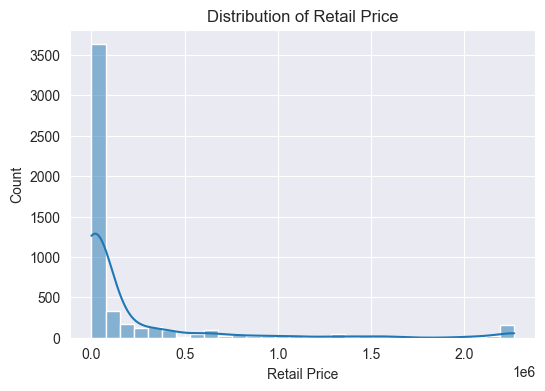

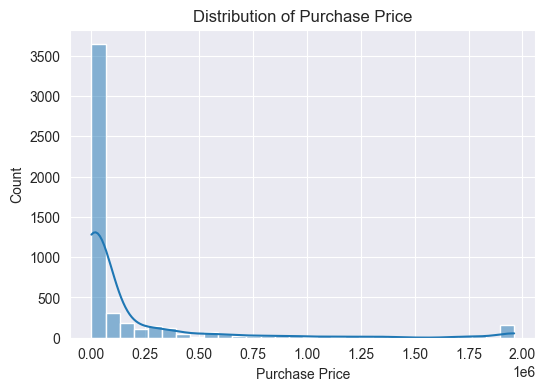

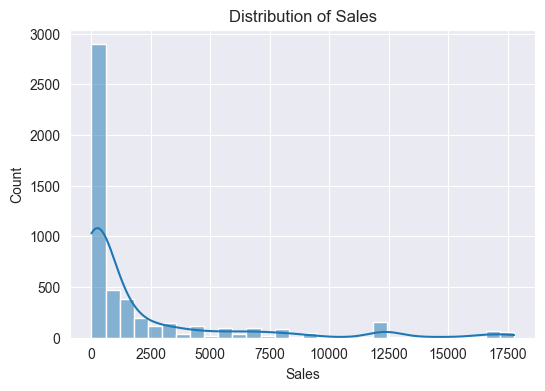

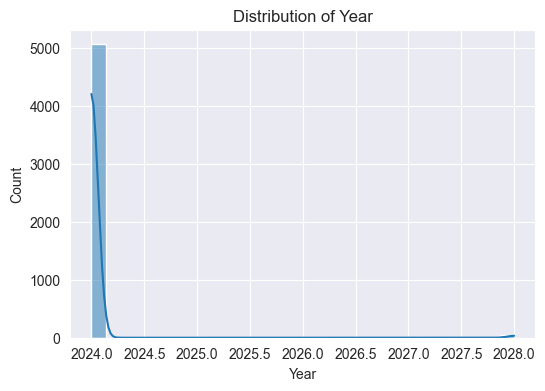

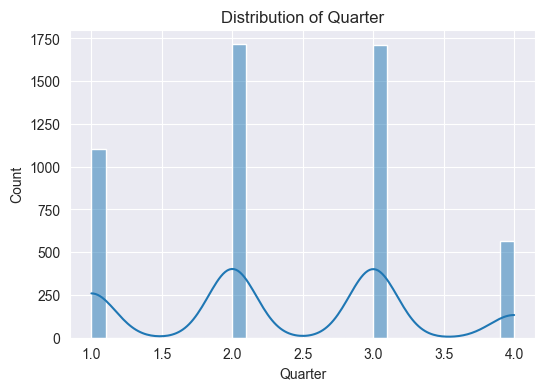

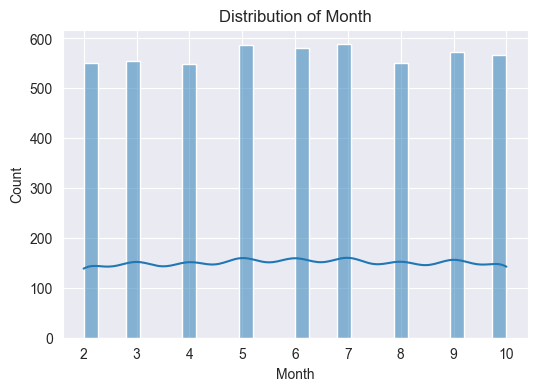

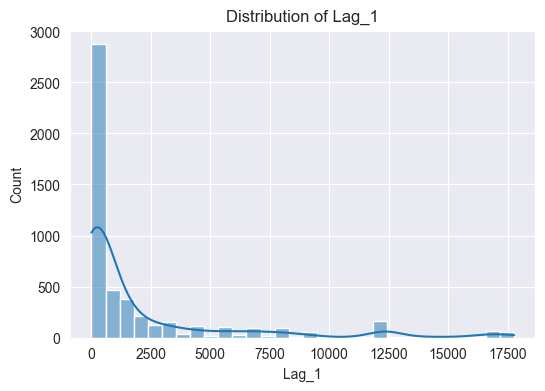

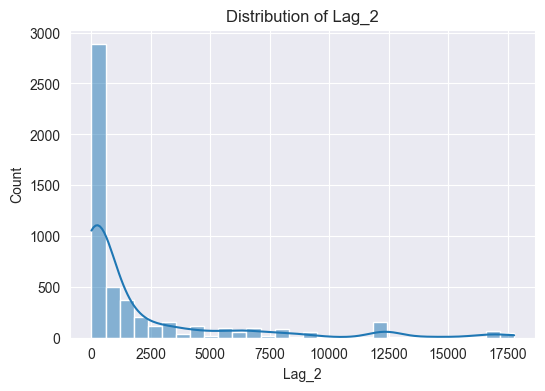

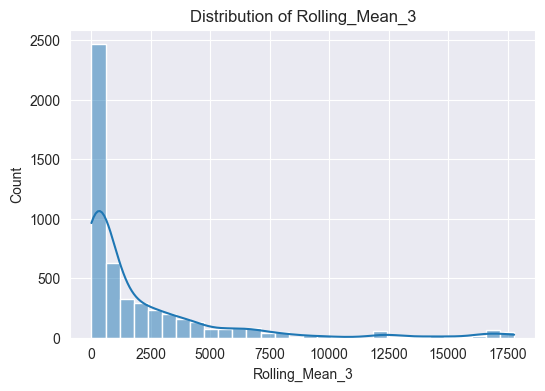

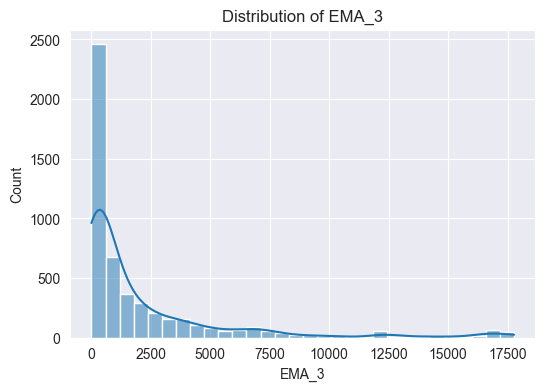

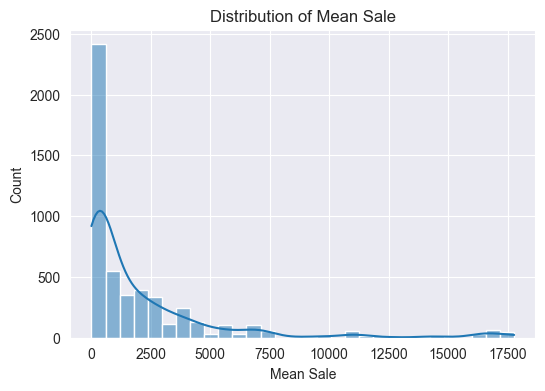

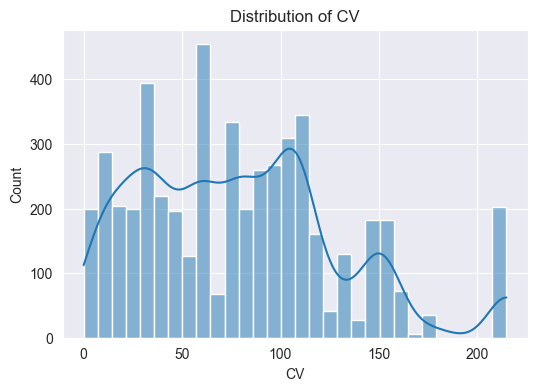

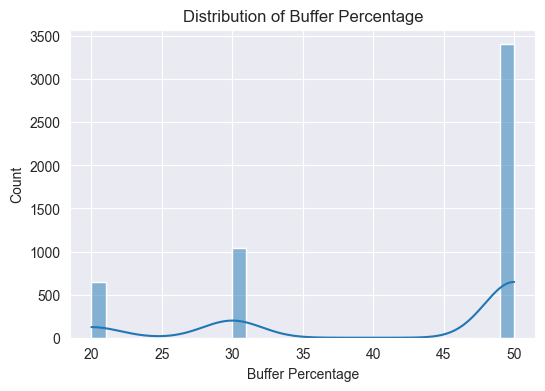

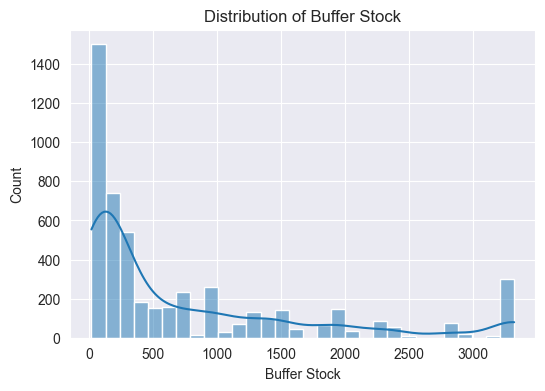

In [8]:
# 5. Feature Distributions
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

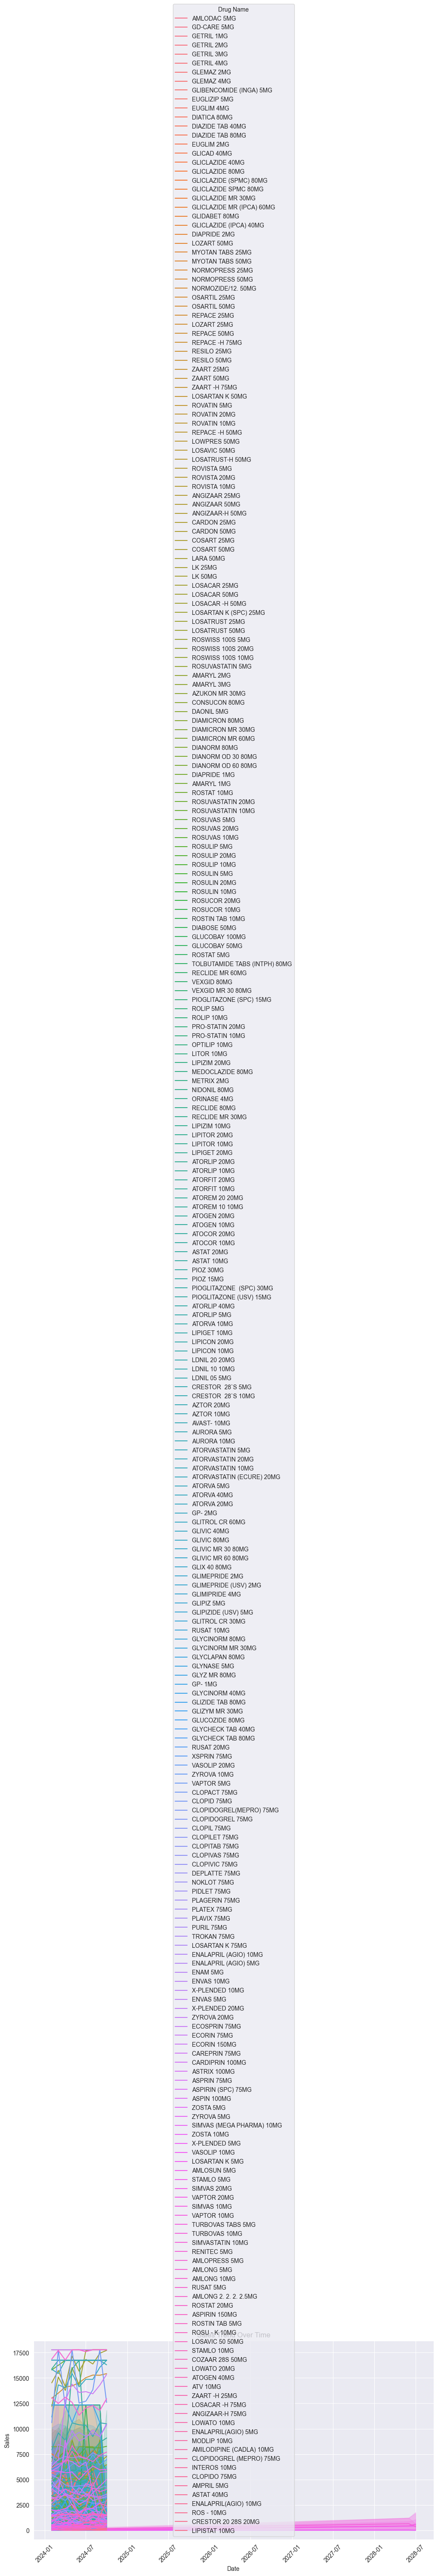

In [9]:
# 6. Time Series Analysis (Trend & Seasonality)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Sales', hue='Drug Name')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

In [10]:
# 7. Stationarity Check (ADF Test)
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is NOT stationary")

adf_test(df['Sales'])

ADF Statistic: -29.540454150716922
p-value: 0.0
The series is stationary


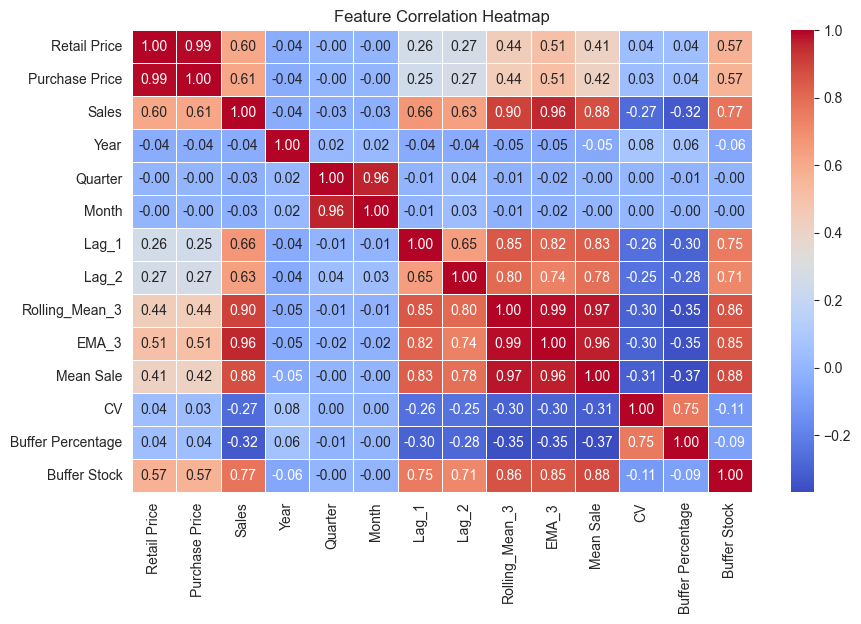

In [12]:
# 8. Correlation Analysis

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


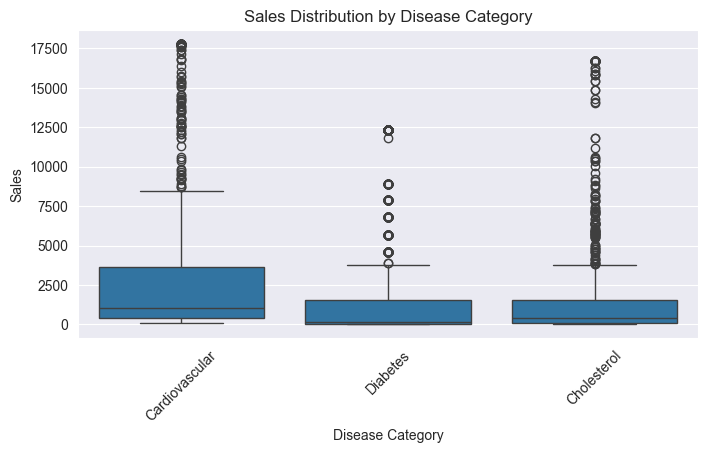

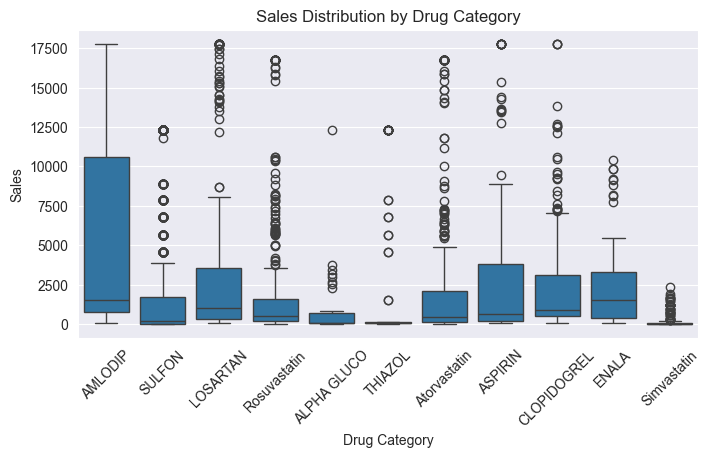

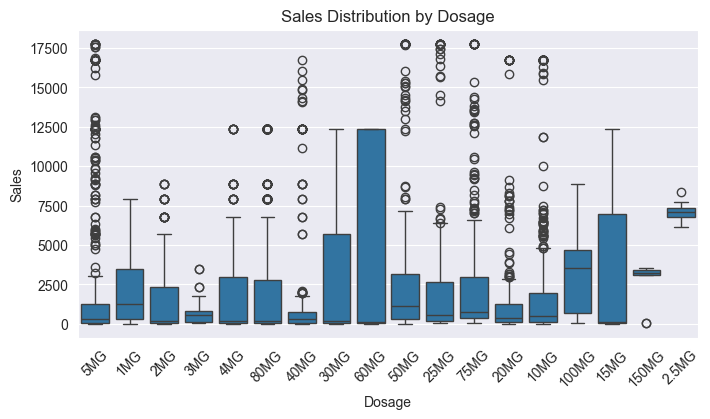

In [13]:
# 9. Category-wise Analysis
cat_cols = ['Disease Category', 'Drug Category', 'Dosage']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, y='Sales')
    plt.title(f'Sales Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [14]:
# 10. Regression vs. Classification Check
if df['Sales'].nunique() > 20:
    print("This is a regression problem.")
else:
    print("This is a classification problem.")


This is a regression problem.
